## Ensemble

simple ensembing by averaging predictions

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import pandas as pd
from pathlib import Path

In [5]:
data_dir = Path('data')
sub_dir=data_dir/'submissions'

In [7]:
df_resnet_1=pd.read_csv(sub_dir/'stage-2-rn50-03_1-cv_reflect_101-20191026-1964891c.csv')

In [8]:
df_resnet_2=pd.read_csv(sub_dir/'stage-2-rn50-05_3-cv_wrap-20191028-51e21949.csv')

In [9]:
df_densenet_1=pd.read_csv(sub_dir/'stage-2-dn121-06_7-cv_reflect_101-20191031-d3611e57.csv')

In [10]:
df_efficientnet_1=pd.read_csv(sub_dir/'stage-2-efficient_net_b0-06_3-efficientnet-20191030-9c8c52b7.csv')

### average

In [11]:
df_concat = pd.concat((df_resnet_1, df_resnet_2, df_densenet_1, df_efficientnet_1))

In [12]:
df_concat.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.013808,0.980777,0.000303,0.003716,0.001395
1,7a4bbbd6,0.000810,0.949852,0.000470,0.048376,0.000491
2,7a4ac744,0.001608,0.855418,0.001628,0.140389,0.000957
3,7a4881fa,0.004803,0.234743,0.006764,0.752769,0.000920
4,7a4aa4a8,0.004477,0.706235,0.003069,0.283955,0.002263


In [13]:
by_row_index = df_concat.groupby(df_concat.index)

In [29]:
by_row_index.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.013808,0.980777,3.033101e-04,0.003716,1.395275e-03
1,7a4bbbd6,0.000810,0.949852,4.703865e-04,0.048376,4.913071e-04
2,7a4ac744,0.001608,0.855418,1.627956e-03,0.140389,9.566082e-04
3,7a4881fa,0.004803,0.234743,6.764163e-03,0.752769,9.204771e-04
4,7a4aa4a8,0.004477,0.706235,3.069423e-03,0.283955,2.263286e-03
...,...,...,...,...,...,...
7320,7a4f3ff4,0.000007,0.986375,9.416152e-06,0.013183,4.260044e-04
7321,7a4fc578,0.000011,0.999986,1.482010e-08,0.000003,7.726951e-07
7322,7a4ac7b2,0.006544,0.965922,1.611289e-03,0.024577,1.346010e-03
7323,7a47e25e,0.134326,0.853810,7.822608e-06,0.011738,1.179837e-04


In [14]:
df_means = by_row_index.mean()

In [15]:
df_means.head()

,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,0.006900,0.984284,0.001062,0.006436,0.001319
1,0.000997,0.951669,0.000856,0.045864,0.000613
2,0.007501,0.808328,0.007310,0.175371,0.001490
3,0.004724,0.170939,0.006211,0.816583,0.001543
4,0.008597,0.738466,0.003730,0.247354,0.001853


In [16]:
df_means['Sum'] = df_means.sum(axis=1)

In [17]:
df_means.head()

,concrete_cement,healthy_metal,incomplete,irregular_metal,other,Sum
0,0.006900,0.984284,0.001062,0.006436,0.001319,1.0
1,0.000997,0.951669,0.000856,0.045864,0.000613,1.0
2,0.007501,0.808328,0.007310,0.175371,0.001490,1.0
3,0.004724,0.170939,0.006211,0.816583,0.001543,1.0
4,0.008597,0.738466,0.003730,0.247354,0.001853,1.0


In [19]:
len(df_means['Sum'].unique())

7120

In [25]:
len(df_means)

7325

In [22]:
df_means['Sum'].max()

1.0000001231114766

In [23]:
df_means['Sum'].min()

0.9999998725603092

In [24]:
df_means.drop(columns=['Sum'],inplace=True)

In [30]:
df_means['id'] = df_resnet_1['id']

In [31]:
df_means.head()

,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id
0,0.006900,0.984284,0.001062,0.006436,0.001319,7a4d630a
1,0.000997,0.951669,0.000856,0.045864,0.000613,7a4bbbd6
2,0.007501,0.808328,0.007310,0.175371,0.001490,7a4ac744
3,0.004724,0.170939,0.006211,0.816583,0.001543,7a4881fa
4,0.008597,0.738466,0.003730,0.247354,0.001853,7a4aa4a8


In [33]:
cols = df_means.columns.tolist()

In [35]:
cols=['id','concrete_cement',
 'healthy_metal',
 'incomplete',
 'irregular_metal',
 'other']

In [36]:
df_means = df_means[cols]

In [37]:
df_means.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.006900,0.984284,0.001062,0.006436,0.001319
1,7a4bbbd6,0.000997,0.951669,0.000856,0.045864,0.000613
2,7a4ac744,0.007501,0.808328,0.007310,0.175371,0.001490
3,7a4881fa,0.004724,0.170939,0.006211,0.816583,0.001543
4,7a4aa4a8,0.008597,0.738466,0.003730,0.247354,0.001853


In [38]:
df_means.to_csv(data_dir/f'submissions/07_2_fastai_simple_ensemble_20191103.csv', index=False)

#### Submission result

sub 11: 0.4306

In [39]:
pred_df=pd.read_csv(data_dir/f'submissions/07_2_fastai_simple_ensemble_20191103.csv')

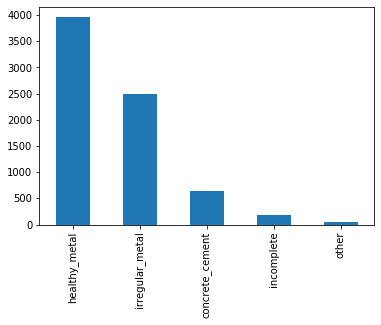

In [40]:
pred_df.drop(columns=['id'],inplace=True)
classes=pred_df.idxmax(axis=1)
pd.value_counts(classes).plot(kind="bar")